<a href="https://colab.research.google.com/github/steeve85ok/SIM_YAC_ALMEIDA_UPSE2023/blob/main/transmisib17june.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy  as np
import math

In [ ]:
L=10000
dx=2500
Tiempo=100
DT=1
K=50 #Permeabilidad MD
por=0.2
vis=1 # centipoise
Beta=1
CompTotal=1*10**(-6) #ps1-1
A=200000#ft^2

In [ ]:
Alpha=K/(vis*por*CompTotal)
Alpha
Eta=(Alpha*DT)/(dx**2)
Eta

40.0

In [ ]:
#Condiciones inicialea
Pyac=4000
Piz=2000
Pder=0
Pin=np.ones((L//dx)+2)
Qres=np.zeros((L//dx))
Pres=np.zeros((L//dx)+2)
Pin=Pin*Pyac #inicilaizamos vector con la prsion de yacimiento
Pin[0]=2*Piz-Pin[1] #condicion de neuman
Pin[len(Pin)-1]=2*Pder-Pin[len(Pin)-2]

Pin.shape

(6,)

In [ ]:
#Esquema Implicito
Pimplicita=np.zeros((Tiempo//DT,(L//dx)+2)) # matriz
Qimplicita=np.zeros((Tiempo//DT,(L//dx))) # matriz
# Pin=np.ones((L//dx)+2) jugar con codigo
Pres=np.zeros((L//dx)+2)
#Pin=Pin*Pyac
#Pin[0]=Piz
#Pin[len(Pin)-1]=Pder
N=(L//dx)+2
Baccumul=A*dx*por*CompTotal/Beta
Transmisibilidad=(K*A/(vis*Beta*dx))*6.33*10**-3
B=np.zeros([N-2,N-2])
T=np.zeros([N-2,N-2])
Transmisibilidad


25.32

In [ ]:
for i in range(0,N-2):
  B[i,i]=Baccumul#matriz diagonal


for i in range(0,N-2):
  T[i,i]=2*Transmisibilidad#matriz transmisibilidad
  if i>0:
    T[i,i-1]=-Transmisibilidad #arriba diag matriz
  if i<(N-3):
    T[i,i+1]=-Transmisibilidad #abajo
T[0,0]=3*Transmisibilidad
T[N-3,N-3]=Transmisibilidad

T

array([[ 75.96, -25.32,   0.  ,   0.  ],
       [-25.32,  50.64, -25.32,   0.  ],
       [  0.  , -25.32,  50.64, -25.32],
       [  0.  ,   0.  , -25.32,  25.32]])

In [ ]:
Matriz_resolucion=np.zeros_like(T)
Vector_sol=np.zeros_like(Pin[1:-1]) #Ec 3.41
Matriz_resolucion=T+(B/DT)
Vector_sol=np.matmul(B/DT,Pin[1:-1])
#Pres=[]

Q=np.zeros_like(Vector_sol)
Q[0]=2*Transmisibilidad*Piz  # ec 3.41 unic que cambia con interacciones es el vector P
Vector_sol=Vector_sol+Q
Vector_sol
Transmisibilidad

25.32

In [ ]:
Pcal=np.linalg.solve(Matriz_resolucion,Vector_sol)

In [ ]:
Pcal

array([3409.70741128, 3897.79289447, 3982.21682344, 3996.40703774])

In [ ]:
Vector_sol

array([501280., 400000., 400000., 400000.])

In [ ]:
Qimplicita[0]=Q #core principal de codigo
t=DT
while t<Tiempo:
  Pcal=np.linalg.solve(Matriz_resolucion,Vector_sol)
  Pres=np.concatenate(([Piz],Pcal,[Pder]))
  Pimplicita[t//DT]=Pres
  Vector_sol=np.matmul(B/DT,Pcal)+Q
  Qimplicita[t//DT]=Vector_sol #primer vector Q
  t=t+DT

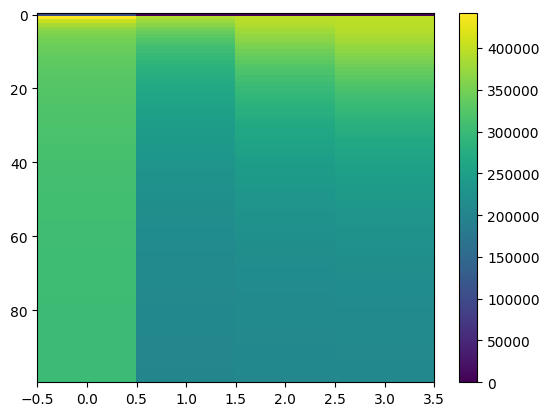

In [ ]:
import matplotlib.pyplot as plt

imgplot = plt.imshow(Qimplicita,aspect='auto')
plt.colorbar()


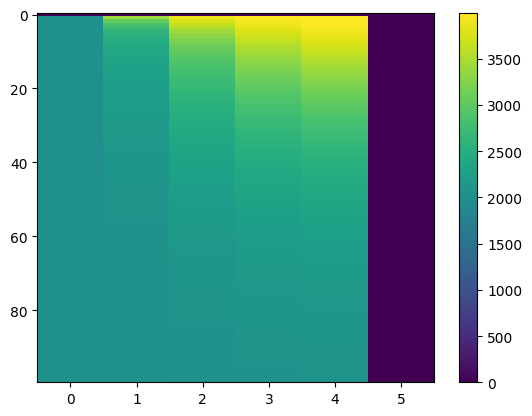

In [ ]:
import matplotlib.pyplot as plt

imgplot = plt.imshow(Pimplicita,aspect='auto')
plt.colorbar()